<a href="https://colab.research.google.com/github/Ademide-Ade/Adewale-Ademide-HDSC/blob/master/Sample_Stage_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction To TensorFlow: Overview of the MNIST Dataset

## Data Classification & Review

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = keras.datasets.mnist

In [3]:
(train_image, train_label),(test_image, test_label) = data.load_data()

In [4]:
train_image.max()

255

In [5]:
train_label[0]

5

In [6]:
test_label.shape

(10000,)

In [7]:
test_image.shape

(10000, 28, 28)

In [8]:
train_label.shape

(60000,)

In [9]:
train_image.shape

(60000, 28, 28)

In [10]:
np.unique(test_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
np.unique(train_image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Text(0.5, 1.0, 'Label: 5')

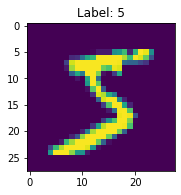

In [12]:
plt.figure(figsize=(9,5))

plt.subplot(1,3,1)
plt.imshow(train_image[0])
plt.title('Label: %.f' %train_label[0])


Text(0.5, 1.0, 'Label: 3')

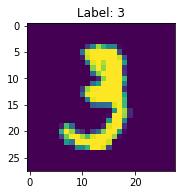

In [13]:
plt.figure(figsize=(9,5))

plt.subplot(1,3,2)
plt.imshow(train_image[10])
plt.title('Label: %.f' %train_label[10])

Text(0.5, 1.0, 'Label: 7')

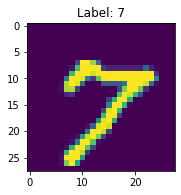

In [14]:
plt.figure(figsize=(9,5))

plt.subplot(1,3,3)
plt.imshow(test_image[9000])
plt.title('Label: %.f' %test_label[9000])


Text(0.5, 1.0, 'Label: 5')

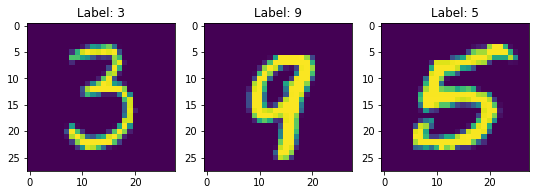

In [15]:
plt.figure(figsize=(9,5))

plt.subplot(1,3,1)
plt.imshow(train_image[50])
plt.title('Label: %.f' %train_label[50])

plt.subplot(1,3,2)
plt.imshow(train_image[800])
plt.title('Label: %.f' %train_label[800])

plt.subplot(1,3,3)
plt.imshow(train_image[20000])
plt.title('Label: %.f' %train_label[20000])

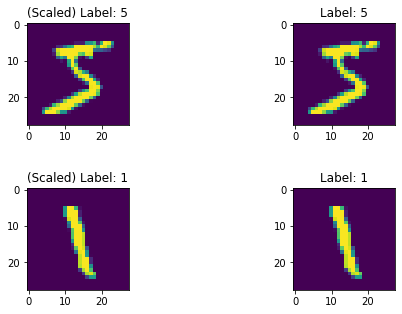

In [16]:
train_images = train_image/255
test_images = test_image/255

fig, axes = plt.subplots(figsize=(9,5))

plt.subplot(2,2,1)
plt.imshow(train_images[0])
plt.title('(Scaled) Label: %.f' %train_label[0])


plt.subplot(2,2,2)
plt.imshow(train_image[0])
plt.title('Label: %.f' %train_label[0])


plt.subplot(2,2,3)
plt.imshow(test_images[700])
plt.title('(Scaled) Label: %.f' %test_label[700])


plt.subplot(2,2,4)
plt.imshow(test_image[700])
plt.title('Label: %.f' %test_label[700])

fig.tight_layout(pad=3.0)

## Modal Analysis Preparation

In [17]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_label[0:50000]
y_val = train_label[50000:]

In [18]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [19]:
#!pip install --upgrade tensorflow

In [20]:
from tensorflow.keras.utils import to_categorical
no_label = 10
y_trains = to_categorical(y_train, no_label)
y_vals = to_categorical(y_val, no_label)
y_test = to_categorical(test_label, no_label)

## Activation Funtion & Hyperparameter Tweaking

In [21]:
#!pip install tensorflow==1.4.0

In [22]:
import tensorflow.compat.v1 as tens
tens.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [23]:
X = tens.placeholder(tens.float32, [None, new_dimension])
Y = tens.placeholder(tens.float32, [None, no_label])

In [24]:
def multilayer_perceptron(x, no_class, first_layer_neuron = 256, second_layer_neuron = 128):
  # First Layer
  first_weight = tens.Variable(tens.random_uniform([new_dimension, first_layer_neuron]))
  first_bais = tens.Variable(tens.zeros([first_layer_neuron]))
  first_layer_output = tens.nn.relu(tens.add(tens.matmul(x, first_weight), first_bais))

  # Second Layer
  second_weight = tens.Variable(tens.random_uniform([first_layer_neuron, second_layer_neuron]))
  second_bais = tens.Variable(tens.zeros([second_layer_neuron]))
  second_layer_output = tens.nn.relu(tens.add(tens.matmul(first_layer_output, second_weight), second_bais))

  # Output Layer
  final_weight = tens.Variable(tens.random_uniform([second_layer_neuron, no_class]))
  final_bais = tens.Variable(tens.zeros([no_class]))
  logits =tens.add(tens.matmul(second_layer_output, final_weight), final_bais)

  return logits

logits = multilayer_perceptron(X, no_label)

In [25]:
learning_rate = 0.01
# The loss and optimiser for the network are defined
loss_op = tens.reduce_mean(tens.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tens.train.AdamOptimizer(learning_rate= learning_rate)
train_ops = optimizer.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [26]:
# Initialised the variable
init = tens.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [27]:
# Training the model
with tens.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_trains[start: end]
      _, loss = session.run([train_ops, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size
      # Average loss
      average_cost += loss/iteration
    print('Epoch ============= {}'.format(epoch))

  # Evaluation Model
  prediction = tens.nn.softmax(logits)
  ground_truth = tens.equal(tens.argmax(prediction, 1), tens.argmax(Y, 1))
  accuracy = tens.reduce_mean(tens.cast(ground_truth, 'float'))
  #session = get_default_session()
  print('Accuracy: {}'.format(accuracy.eval({X: test_images, Y: y_test})))

Epoch ============= 0
Epoch ============= 1
Epoch ============= 2
Epoch ============= 3
Epoch ============= 4
Epoch ============= 5
Epoch ============= 6
Epoch ============= 7
Epoch ============= 8
Epoch ============= 9
Epoch ============= 10
Epoch ============= 11
Epoch ============= 12
Epoch ============= 13
Epoch ============= 14
Epoch ============= 15
Epoch ============= 16
Epoch ============= 17
Epoch ============= 18
Epoch ============= 19
Accuracy: 0.8985999822616577


## Deep Learning Modelling Analysis

In [28]:
# Building a Sequential feed forward using Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#model = Sequential()
# model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
#model.add(Flatten(input_shape=(28,28)))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(no_label, activation= 'softmax'))
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(new_dimension,)), # this here is our first layer; "Input layer"
      keras.layers.Dense(128, activation='relu'), # this is the second layer, Dense - each neurone/node is connected to other neurons in the next network
      keras.layers.Dense(no_label,activation='softmax') ])# Output layer to produce expected 10 neurons

model.compile(optimizer= 'adam', loss="sparse_categorical_crossentropy",
              metrics= ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=20, batch_size = 1000)
test_loss, test_accuracy = model.evaluate(test_images, test_label)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - ETA: 0s - loss: 0.8840 - acc: 0.7641WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
50000/50000 [==============================] - 0s 7us/sample - loss: 0.8840 - acc: 0.7641 - val_loss: 0.3589 - val_acc: 0.9038
Epoch 2/20
50000/50000 [==============================] - 0s 6us/sample - loss: 0.3368 - acc: 0.9065 - val_loss: 0.2723 - val_acc: 0.9272
Epoch 3/20
50000/50000 [==============================] - 0s 7us/sample - loss: 0.2690 - acc: 0.9258 - val_loss: 0.2299 - val_acc: 0.9398
Epoch 4/20
50000/50000 [==============================] - 0s 7us/sample - loss: 0.2297 - acc: 0.936

#### Loss Function Plot For All Neuron Network

Text(0.5, 1.0, 'Loss curve - Before regularisation')

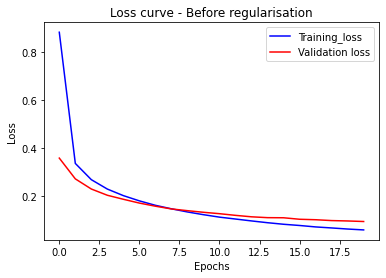

In [29]:
# Check for Overfitting 
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training_loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve - Before regularisation')

## Optimised Analysis Model

##### Explanation!!!

```
# The model drops off irrelevant neuron connection i.e it take the necessary neurons between input and output variable
```



In [30]:
# Although the validation and training loss seems great, we can as well see that the validation loss increases.
# With this that we have observed, it identifies overfitting in our network. How do we proceed?

# We proceed by introducing Regularisation to the model.

from tensorflow.keras.layers import Dropout

regularised = Sequential()
regularised.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
regularised.add(Dropout(0.4))
regularised.add(Dense(128, activation='relu'))
regularised.add(Dropout(0.4))
regularised.add(Dense(no_label, activation='softmax'))

regularised.compile(optimizer='adam', loss=tens.keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'])
reg_history = regularised.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 20, batch_size=1000)
test_loss, test_accuracy = regularised.evaluate(test_images, test_label)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 0s 9us/sample - loss: 0.9462 - acc: 0.6969 - val_loss: 0.2957 - val_acc: 0.9145
Epoch 2/20
50000/50000 [==============================] - 0s 8us/sample - loss: 0.3750 - acc: 0.8879 - val_loss: 0.2043 - val_acc: 0.9428
Epoch 3/20
50000/50000 [==============================] - 0s 8us/sample - loss: 0.2809 - acc: 0.9184 - val_loss: 0.1587 - val_acc: 0.9550
Epoch 4/20
50000/50000 [==============================] - 0s 8us/sample - loss: 0.2269 - acc: 0.9340 - val_loss: 0.1341 - val_acc: 0.9616
Epoch 5/20
50000/50000 [==============================] - 0s 8us/sample - loss: 0.1953 - acc: 0.9428 - val_loss: 0.1233 - val_acc: 0.9645
Epoch 6/20
50000/50000 [==============================] - 0s 8us/sample - loss: 0.1740 - acc: 0.9500 - val_loss: 0.1095 - val_acc: 0.9680
Epoch 7/20
50000/50000 [==============================] - 0s 8us/sample - loss: 0.1565 - acc: 0.9537 - val_loss: 0.1034 - 

#### Loss Function Plot For The Undropped (optimised) Network 

Text(0.5, 1.0, 'Loss Curve - After regularisation')

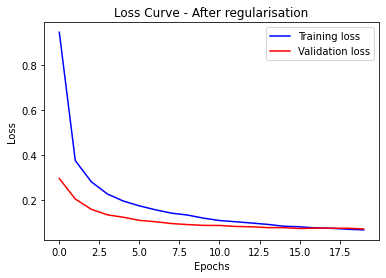

In [31]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve - After regularisation')

## Prediction & Comparison

Prediction for label index 50 is: 6


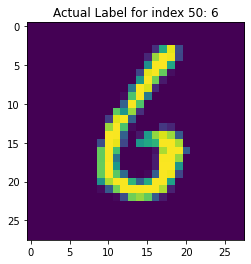

In [32]:
pred = model.predict(test_images)
print('Prediction for label index 50 is: %.f'% np.argmax(pred[50]))

plt.imshow(test_image[50])
plt.title('Actual Label for index 50: %.f'%test_label[50])
plt.show()

#### Plot Comparison Between Actual Label and Predicted Label

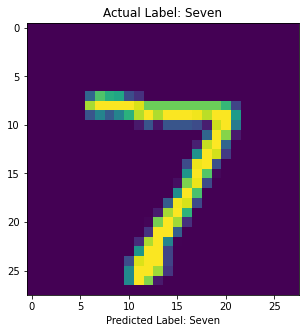

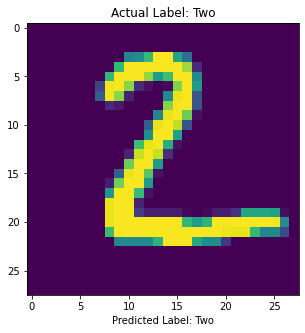

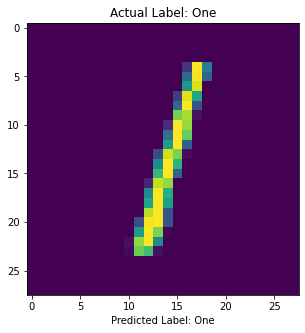

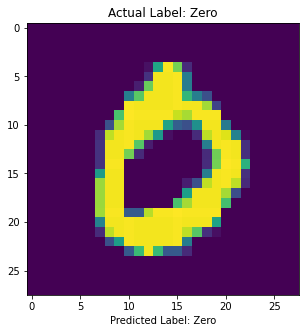

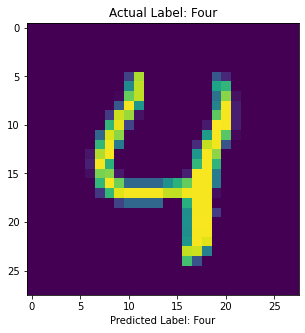

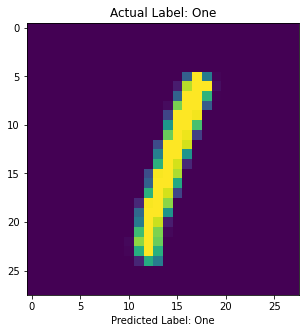

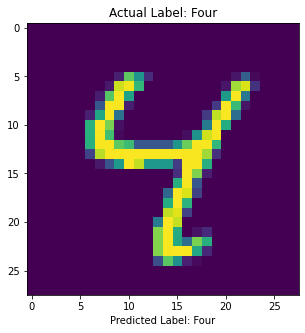

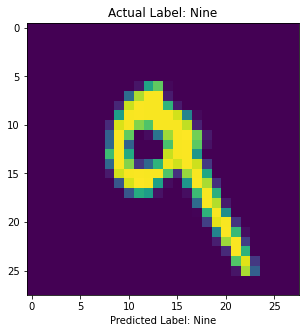

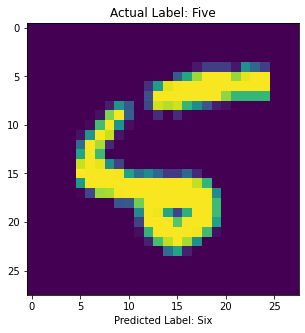

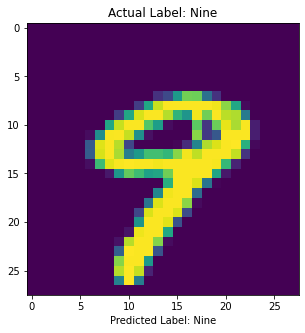

In [33]:
label_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

for i in range(len(label_names)):
  plt.figure(figsize = (9,5))
  
  #plt.subplot(1,1,(i+1))
  plt.imshow(test_image[i], cmap = None)
  plt.title('Actual Label: ' + label_names[test_label[i]])
  plt.xlabel('Predicted Label: ' + label_names[np.argmax(pred[i])])
  plt.show()

#### Checks for Improvement With Optimised Model

Prediction for label index 50 is: 6


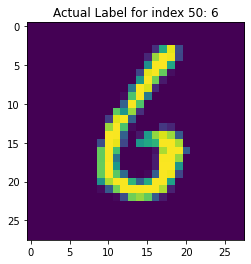

In [34]:
preds = regularised.predict(test_images)
print('Prediction for label index 50 is: %.f'% np.argmax(preds[50]))

plt.imshow(test_image[50])
plt.title('Actual Label for index 50: %.f'%test_label[50])
plt.show()

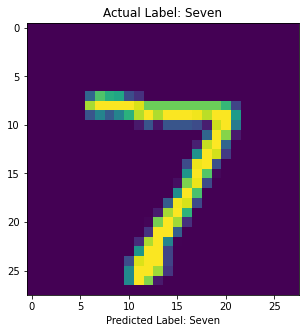

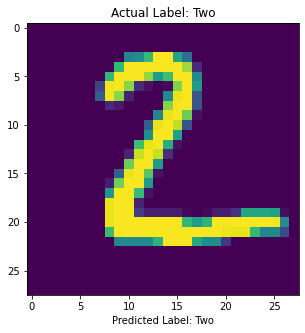

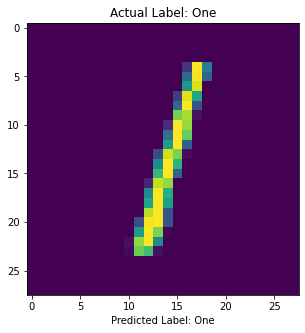

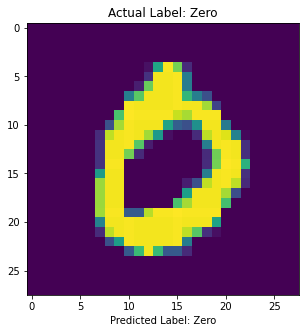

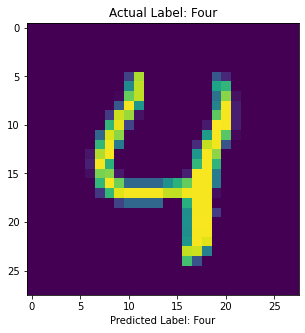

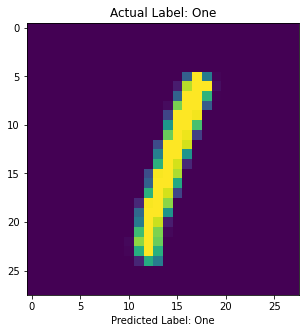

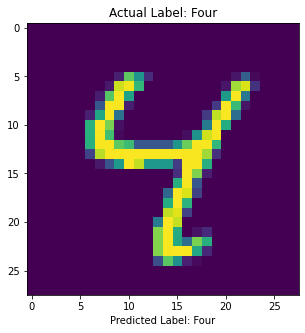

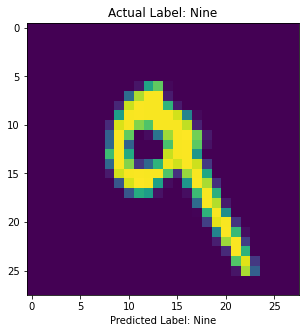

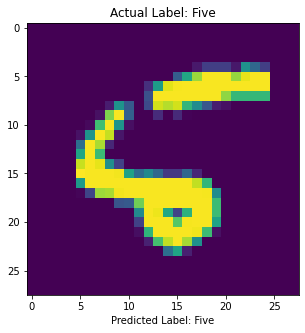

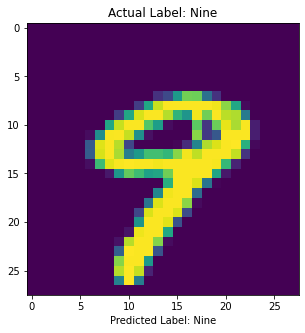

In [35]:
label_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

for i in range(len(label_names)):
  plt.figure(figsize = (9,5))
  
  #plt.subplot(1,1,(i+1))
  plt.imshow(test_image[i], cmap = None)
  plt.title('Actual Label: ' + label_names[test_label[i]])
  plt.xlabel('Predicted Label: ' + label_names[np.argmax(preds[i])])
  plt.show()